In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Diseases.csv')
data

,Tiredness,Dry-Cough,Sore-Throat,Age_0-9,Severity
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
316795,0,0,0,0,0
316796,0,0,0,0,0
316797,0,0,0,0,0
316798,0,0,0,0,0


In [3]:
data.isna().sum()

Tiredness      0
Dry-Cough      0
Sore-Throat    0
Age_0-9        0
Severity       0
dtype: int64

array([[<Axes: title={'center': 'Tiredness'}>,
        <Axes: title={'center': 'Dry-Cough'}>],
       [<Axes: title={'center': 'Sore-Throat'}>,
        <Axes: title={'center': 'Age_0-9'}>],
       [<Axes: title={'center': 'Severity'}>, <Axes: >]], dtype=object)

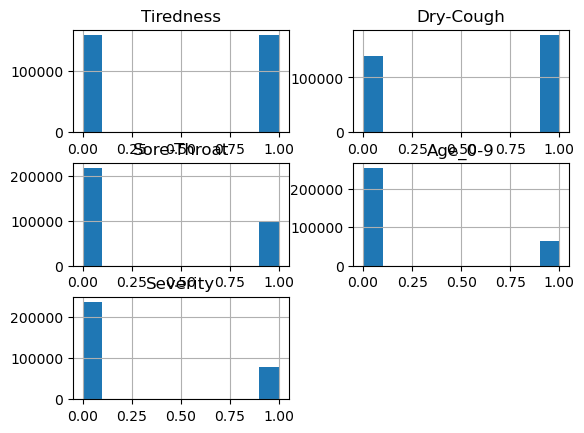

In [4]:
data.hist()

In [5]:
data.describe()

,Tiredness,Dry-Cough,Sore-Throat,Age_0-9,Severity
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.500000,0.562500,0.312500,0.200000,0.250000
std,0.500001,0.496079,0.463513,0.400001,0.433013
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
x=data.iloc[:,1:4]
x

,Dry-Cough,Sore-Throat,Age_0-9
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
316795,0,0,0
316796,0,0,0
316797,0,0,0
316798,0,0,0


In [8]:
y=data.iloc[:,-1:]
y

,Severity
0,0
1,0
2,0
3,1
4,1
...,...
316795,0
316796,0
316797,0
316798,0


In [9]:
data.corr()

,Tiredness,Dry-Cough,Sore-Throat,Age_0-9,Severity
Tiredness,1.000000e+00,3.779645e-01,-1.348400e-01,4.505202e-16,6.958681e-17
Dry-Cough,3.779645e-01,1.000000e+00,5.096472e-02,-1.896458e-17,5.418947e-17
Sore-Throat,-1.348400e-01,5.096472e-02,1.000000e+00,-5.386233e-16,-3.405939e-18
Age_0-9,4.505202e-16,-1.896458e-17,-5.386233e-16,1.000000e+00,8.943125e-16
Severity,6.958681e-17,5.418947e-17,-3.405939e-18,8.943125e-16,1.000000e+00


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
data.shape

(316800, 5)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.25068404]
 [0.25138402]
 [0.2502643 ]
 ...
 [0.25138402]
 [0.25096428]
 [0.25005569]]

 Testing is also completed....



In [13]:
ytest

,Severity
277936,1
193502,0
92446,0
117607,0
240924,0
...,...
122340,0
151370,0
288434,0
1619,0


In [14]:
diff=ytest-ypred
diff

,Severity
277936,0.749316
193502,-0.251384
92446,-0.250264
117607,-0.249356
240924,-0.249356
...,...
122340,-0.250264
151370,-0.249356
288434,-0.251384
1619,-0.250964


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 0.18804980043081385

RMSE: 	 0.4336470920354636

Variance Score:	 -2.4557648323986214e-05

R-Square: 	 -3.445381096534028e-05


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming you have already loaded your dataset and labeled it appropriately
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(xtrain, ytrain)
X_test_lda = lda.transform(xtest)

# Fit a linear regression model on the reduced data
regression_model = LinearRegression()
regression_model.fit(X_train_lda, ytrain)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_lda)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18804980043081382


C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

# Fit a linear regression model on the PCA-transformed data
regression_model = LinearRegression()
regression_model.fit(X_train_pca, ytrain)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18804980043081382


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.18804980043081382


In [20]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42  # Seed for reproducibility
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.18804980043081382


C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, ytrain)
X_test_lda = lda.transform(X_test)

# Apply Principal Component Analysis (PCA) to LDA-transformed data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

# Define the linear regression model
regression_model = LinearRegression()

# Define the hyperparameters to search over
param_dist = {
    'fit_intercept': [True, False],
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42  # Seed for reproducibility
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.18804980043081382


In [23]:
data["Severity"].value_counts()

0    237600
1     79200
Name: Severity, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [25]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

Majority length:	 237600

Minority length:	 79200
        Tiredness  Dry-Cough  Sore-Throat  Age_0-9  Severity
0               1          1            1        1         0
1               1          1            1        1         0
2               1          1            1        1         0
6               1          1            1        1         0
7               1          1            1        1         0
...           ...        ...          ...      ...       ...
250947          0          0            0        0         1
6976            0          0            0        0         1
237532          1          1            0        0         1
151803          0          0            1        0         1
148599          1          1            1        0         1

[238100 rows x 5 columns]

Axes(0.125,0.11;0.775x0.77)


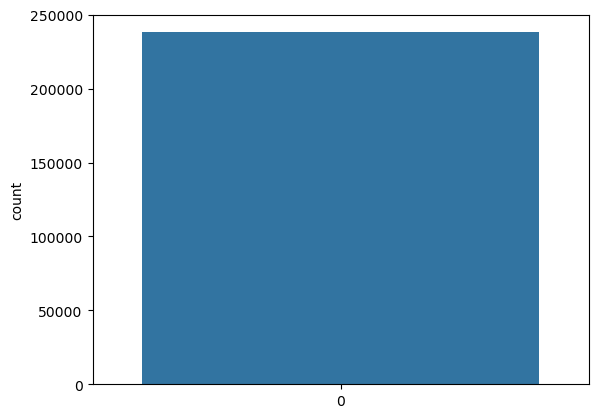

In [27]:
from sklearn.utils import resample
import pandas as pd
import seaborn as sns

# Assuming df is your original DataFrame
dj_majority = data[data.Severity == 0]
dj_minority = data[data.Severity == 1]

print('Majority length:\t', len(dj_majority))
print()
print('Minority length:\t', len(dj_minority))

# Upsampling the minority class
dj_minority_upsampled = resample(dj_minority, replace=True, n_samples=500, random_state=12)

# Concatenate the majority class and the upsampled minority class
dj_upsampled = pd.concat([dj_majority, dj_minority_upsampled])

print(dj_upsampled)
print()
print(sns.countplot(dj_upsampled['Severity']))

In [28]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

NameError: name 'x_resampled' is not defined

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.25068404]
 [0.25138402]
 [0.2502643 ]
 ...
 [0.25138402]
 [0.25096428]
 [0.25005569]]

 Testing is also completed....



In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 0.18804980043081385

RMSE: 	 0.4336470920354636

Variance Score:	 -2.4557648323986214e-05

R-Square: 	 -3.445381096534028e-05


In [32]:
from sklearn.model_selection import cross_val_score, KFold

regression_model = LinearRegression()
param_dist = {
    'fit_intercept': [True, False],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=kf,  
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train_pca, ytrain)
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train_pca, ytrain, cv=kf, scoring='neg_mean_squared_error')
mse_mean = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {mse_mean}")


C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'fit_intercept': True}
Cross-Validation Mean Squared Error: 0.18736679537330936


In [33]:
from sklearn.model_selection import cross_val_score

# Define the linear regression model
regression_model = LinearRegression()

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this as needed

# Perform k-fold cross-validation to evaluate the model
mse_scores = -cross_val_score(regression_model, X_train_pca, ytrain, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the average MSE from cross-validation
average_mse = mse_scores.mean()
print(f"Average Mean Squared Error from {num_folds}-fold cross-validation: {average_mse}")

# Fit the model on the entire training dataset
regression_model.fit(X_train_pca, ytrain)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_pca)

# Evaluate the regression model using Mean Squared Error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Average Mean Squared Error from 5-fold cross-validation: 0.18736620110611638
Mean Squared Error on the test set: 0.18804980043081382


In [36]:
# Reset the index of ytrain
ytrain.reset_index(drop=True, inplace=True)

# Perform LOOCV
for train_index, test_index in loocv.split(X_train_pca):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = ytrain[train_index], ytrain[test_index]

    # Rest of the code remains the same
    # ...


KeyError: "None of [Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,\n                 9,     10,\n            ...\n            253430, 253431, 253432, 253433, 253434, 253435, 253436, 253437,\n            253438, 253439],\n           dtype='int64', length=253439)] are in the [columns]"

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

loocv = KFold(n_splits=len(X_train_pca))
regression_model = LinearRegression()
mse_scores = []
X_train_pca = np.array(X_train_pca)
Ytrain = np.array(ytrain)
for train_index, test_index in loocv.split(X_train_pca):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = Ytrain[train_index], Ytrain[test_index]  # Make sure to use 'Ytrain' here

    regression_model.fit(X_train_cv, y_train_cv)

    y_pred_cv = regression_model.predict(X_test_cv)
    mse_fold = mean_squared_error(y_test_cv, y_pred_cv)
    mse_scores.append(mse_fold)
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (LOOCV): {mse_mean}")
